Rows and Columns

In [22]:
#libraries
import pandas as pd
dataset=pd.read_csv('C:/Users/Administrator/Desktop/Dataset.csv')


Missing values in column 

In [23]:
# Missing values in each column
missing_values = dataset.isnull().sum()

# Display the missing values
print(missing_values)


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


Handle Missing Values

In [24]:
from sklearn.impute import SimpleImputer
dataset.dropna(axis=1, thresh=len(dataset) * 0.5, inplace=True)
# Impute missing values for numerical columns with the mean
numerical_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
dataset[numerical_columns] = imputer.fit_transform(dataset[numerical_columns])
# Impute missing values for categorical columns with the mode
categorical_columns = dataset.select_dtypes(include=['object']).columns
for column in categorical_columns:
    mode_value = dataset[column].mode()[0]
    dataset[column].fillna(mode_value, inplace=True)
# Verify that there are no missing values left
missing_values_count = dataset.isnull().sum()
print(missing_values_count)


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


Analyze the distribution of the target variable

Column Names:
 Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')
Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


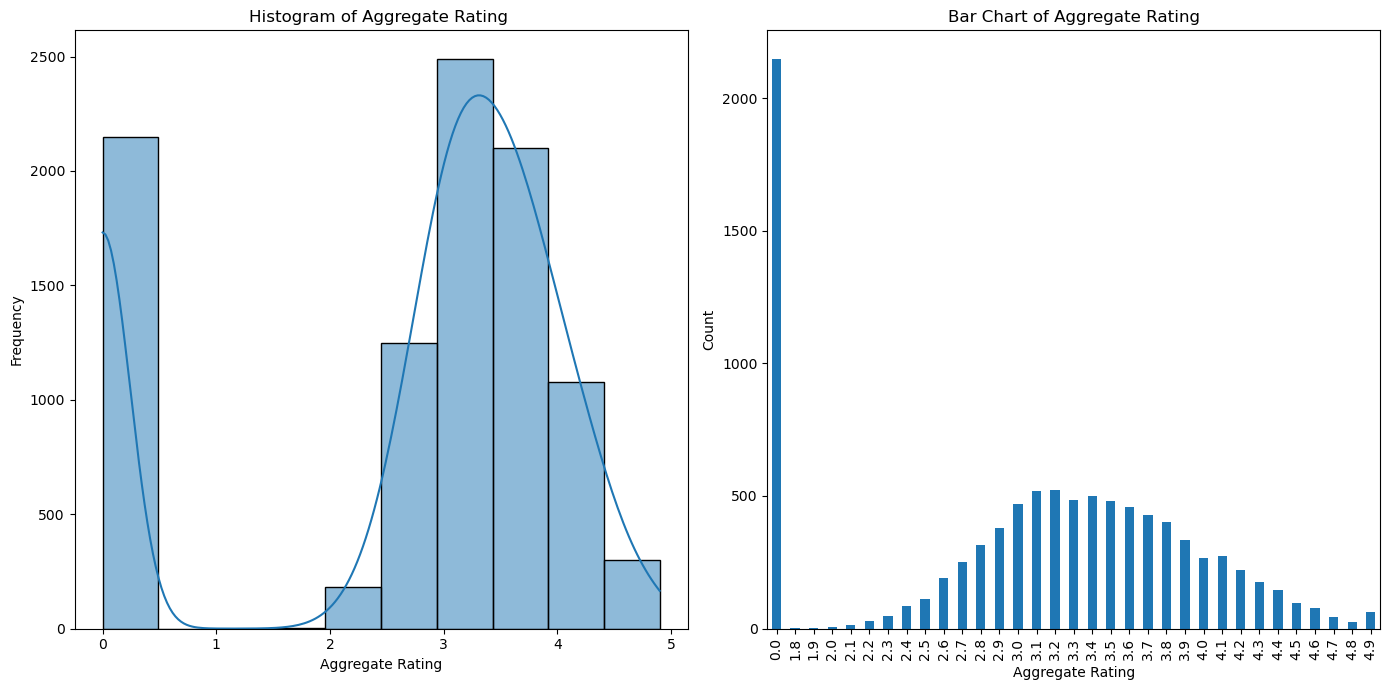

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
datasets = pd.read_csv('C:/Users/Administrator/Desktop/Dataset.csv', on_bad_lines='skip')

# Display column names
print("Column Names:\n", datasets.columns)

# Define and check the target variable
target_variable = 'Aggregate rating'
if target_variable in datasets.columns:
    
    datasets[target_variable] = pd.to_numeric(datasets[target_variable], errors='coerce')
    
  
    print(datasets[target_variable].value_counts())

    # Visualize the distribution
    plt.figure(figsize=(14, 7))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(datasets[target_variable].dropna(), bins=10, kde=True)
    plt.title('Histogram of Aggregate Rating ')
    plt.xlabel('Aggregate Rating')
    plt.ylabel('Frequency')

    # Bar Chart
    plt.subplot(1, 2, 2)
    datasets[target_variable].value_counts().sort_index().plot(kind='bar')
    plt.title('Bar Chart of Aggregate Rating')
    plt.xlabel('Aggregate Rating')
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()
else:
    print(f"Class is imbalance\n'{target_variable}' column is not available in the dataset.")

